# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import nltk 
from textblob import TextBlob
from sklearn.preprocessing import LabelEncoder
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import json

# LOAD DATASET

In [2]:
df=pd.read_csv('final_intern.csv')
df.sample(5)

,id,name,rating,text,username
2300,AVqkIhxunnc1JgDc3kg_,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",4,bought husband christmas loves fits needs perf...,Nana
2136,AVph0EeEilAPnD_x9myq,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",3,perfect age group bought loves,Angie
2232,AVqVGWLKnnc1JgDc3jF1,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",4,need better info special needs children kids u...,Katie
539,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,5,reliable,ByAmazon Customer
2205,AVqVGWLKnnc1JgDc3jF1,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",5,daughter two loves colors dose puzzles,Dawn


# DEAL WITH  MISSING VALUES OF DATASET

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2423 entries, 0 to 2422
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        2423 non-null   object
 1   name      2423 non-null   object
 2   rating    2423 non-null   int64 
 3   text      2417 non-null   object
 4   username  2390 non-null   object
dtypes: int64(1), object(4)
memory usage: 94.8+ KB


In [4]:
bool_series = pd.isnull(df["username"])
df[bool_series]

,id,name,rating,text,username
134,AVpe9W4D1cnluZ0-avf0,Hoover174 Platinum Collection153 Lightweight B...,1,sale cannot push plush carpet even employee sa...,NaN
135,AVpe9W4D1cnluZ0-avf0,Hoover174 Platinum Collection153 Lightweight B...,2,dogs lot tile liked oreck much better lot bett...,NaN
138,AVpe9W4D1cnluZ0-avf0,Hoover174 Platinum Collection153 Lightweight B...,4,awesome suction power completely captured dirt...,NaN
139,AVpe9W4D1cnluZ0-avf0,Hoover174 Platinum Collection153 Lightweight B...,4,lve item very light weight easy use dust free ...,NaN
140,AVpe9W4D1cnluZ0-avf0,Hoover174 Platinum Collection153 Lightweight B...,4,wanted simple upright clog easily also prefer ...,NaN
141,AVpe9W4D1cnluZ0-avf0,Hoover174 Platinum Collection153 Lightweight B...,4,hoovers past years went looking new vacuum cam...,NaN
152,AVpe9W4D1cnluZ0-avf0,Hoover174 Platinum Collection153 Lightweight B...,5,bought platinum upright years ago love bought ...,NaN
153,AVpe9W4D1cnluZ0-avf0,Hoover174 Platinum Collection153 Lightweight B...,5,hoover best class limited six year warranty be...,NaN
154,AVpe9W4D1cnluZ0-avf0,Hoover174 Platinum Collection153 Lightweight B...,5,vacuum performs well competitors limited six y...,NaN
155,AVpe9W4D1cnluZ0-avf0,Hoover174 Platinum Collection153 Lightweight B...,5,lightweight powerfull need bells whistles vacu...,NaN


In [5]:
df.dropna(inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2384 entries, 0 to 2422
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        2384 non-null   object
 1   name      2384 non-null   object
 2   rating    2384 non-null   int64 
 3   text      2384 non-null   object
 4   username  2384 non-null   object
dtypes: int64(1), object(4)
memory usage: 111.8+ KB


In [7]:
#total users
len(df['username'].unique())

87

In [8]:
#total products
len(df['id'].unique())

38

# TEXT PRE-PROCESSING

In [9]:
with open('contractions.json', 'r') as f:
    contractions_dict = json.load(f)
contractions = contractions_dict
print(contractions)
print(len(contractions))

{"ain't": 'am not', "aren't": 'are not', "can't": 'can not', "can't've": 'can not have', "'cause": 'because', "could've": 'could have', "couldn't": 'could not', "couldn't've": 'could not have', "didn't": 'did not', "doesn't": 'does not', "don't": 'do not', "hadn't": 'had not', "hadn't've": 'had not have', "hasn't": 'has not', "haven't": 'have not', "he'd": 'he would', "he'd've": 'he would have', "he'll": 'he will', "he'll've": 'he will have', "he's": 'he is', "how'd": 'how did', "how'd'y": 'how do you', "how'll": 'how will', "how's": 'how is', "I'd": 'I would', "I'd've": 'I would have', "I'll": 'I will', "I'll've": 'I will have', "I'm": 'I am', "I've": 'I have', "isn't": 'is not', "it'd": 'it had', "it'd've": 'it would have', "it'll": 'it will', "it'll've": 'it will have', "it's": 'it is', "let's": 'let us', "ma'am": 'madam', "mayn't": 'may not', "might've": 'might have', "mightn't": 'might not', "mightn't've": 'might not have', "must've": 'must have', "mustn't": 'must not', "mustn't'v

In [10]:
stop = stopwords.words('english')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [11]:
new_stop=[]
not_removable_stop=['but','not','few','more','most','no','nor','very','too','same','only','']
for e in stop:
        if e not in not_removable_stop:
            new_stop.append(e)
new_stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'oth

In [12]:
with open('contractions.json', 'r') as f:
    contractions_dict = json.load(f)
contractions = contractions_dict
stop = stopwords.words('english')
new_stop=[]
not_removable_stop=['but','not','few','more','most','no','nor','very','too','same','only','']
for e in stop:
        if e not in not_removable_stop:
            new_stop.append(e)
            
def cleaned_text(text):                                            
    text = re.sub(r"\d+", " ", str(text))                                                                       
    text = re.sub(r"\b[a-zA-Z]\b", "", str(text))                  
    text = re.sub(r"[^\w\s]", " ", str(text))                                            
    text = re.sub(r"\s+", " ", str(text))
    text = text.lower()
    for word in text.split():
        if word.lower() in contractions:
            text = text.replace(word, contractions[word.lower()])  
    return ' '.join([word for word in text.split() if word not in (new_stop)])
    return text
df['cleaned_text'] = df['text'].apply(cleaned_text)
df.sample(5)



,id,name,rating,text,username,cleaned_text
2220,AVqVGWLKnnc1JgDc3jF1,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",4,great tablet children but doesnt work google apps,Mike,great tablet children but doesnt work google apps
1419,AVqVGWQDv8e3D1O-ldFr,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",5,better older models bigger better,Dave,better older models bigger better
2273,AVqkIhxunnc1JgDc3kg_,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",1,liked first except browser kind clunky also us...,Jimbo,liked first except browser kind clunky also us...
552,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,5,thank,ByAmazon Customer,thank
1338,AVpe7xlELJeJML43ypLz,AmazonBasics AA Performance Alkaline Batteries...,3,lot batteries good price but last too long,ByAmazon Customer,lot batteries good price but last too long


# SENTIMENT ANALYSIS ON TEXT AND CREATE NEW FEATURES

In [13]:
from textblob import TextBlob
def sentiment(cleaned_textfinal):
    try:
        return TextBlob(str(cleaned_textfinal)).sentiment.polarity
    except:
        return None
df['sentiment'] = df['cleaned_text'].apply(sentiment)
df.sample(5)

,id,name,rating,text,username,cleaned_text,sentiment
878,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,5,seems like very good buy,ByAmazon Customer,seems like very good buy,0.910000
401,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,5,good deal aaa alkaline batteries,ByJohn,good deal aaa alkaline batteries,0.700000
863,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,5,surprised pretty good batteries,ByBrandon,surprised pretty good batteries,0.350000
128,AVpe8gsILJeJML43y6Ed,"Pendaflex174 Divide It Up File Folder, Multi S...",5,utilize color coordination identify type deal ...,Anonymous,utilize color coordination identify type deal ...,0.000000
2297,AVqkIhxunnc1JgDc3kg_,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",4,nice little tablet money few ads deal,David,nice little tablet money few ads deal,0.070833


In [14]:
def new_sentiment(sentiment):
    if(sentiment<0):
        return 'negative'
    elif(sentiment==0):
        return 'nutral'
    elif(sentiment>0):
        return 'positive'
df['new_sentiment'] = df['sentiment'].apply(new_sentiment)
df.sample(5)

,id,name,rating,text,username,cleaned_text,sentiment,new_sentiment
1164,AVpe7xlELJeJML43ypLz,AmazonBasics AA Performance Alkaline Batteries...,5,work advertised fair price,ByAmazon Customer,work advertised fair price,0.700000,positive
946,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,2,dont seem last very long,ByAmazon Customer,dont seem last very long,-0.032500,negative
1166,AVpe7xlELJeJML43ypLz,AmazonBasics AA Performance Alkaline Batteries...,5,work great,ByAmazon Customer,work great,0.800000,positive
2071,AVph0EeEilAPnD_x9myq,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",5,love kindles bought grandson impressed years n...,Lucy,love kindles bought grandson impressed years n...,0.750000,positive
1055,AVpe7xlELJeJML43ypLz,AmazonBasics AA Performance Alkaline Batteries...,5,best price number batteries also last long nam...,ByAmazon Customer,best price number batteries also last long nam...,0.316667,positive


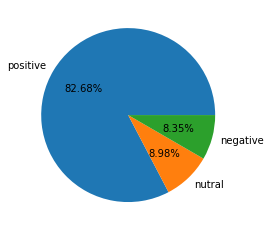

In [15]:
data=df['new_sentiment'].value_counts()
plt.pie(data,labels=data.index.tolist(),autopct='%1.2f%%')
plt.show()

In [16]:
df['updated_score'] = df['rating']*df['sentiment']
df.sample(5)

,id,name,rating,text,username,cleaned_text,sentiment,new_sentiment,updated_score
1968,AVpjEN4jLJeJML43rpUe,"Fire Tablet with Alexa, 7 Display, 16 GB, Blue...",5,needed simple tablet use car long trips bought...,Kris,needed simple tablet use car long trips bought...,0.430000,positive,2.150000
1089,AVpe7xlELJeJML43ypLz,AmazonBasics AA Performance Alkaline Batteries...,5,great batteries great price,ByAmazon Customer,great batteries great price,0.800000,positive,4.000000
732,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,5,good deal nicely packaged,ByAmazon Customer,good deal nicely packaged,0.650000,positive,3.250000
606,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,5,working fine,ByAmazon Customer,working fine,0.416667,positive,2.083333
727,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,5,great batteries great price,ByAmazon Customer,great batteries great price,0.800000,positive,4.000000


In [17]:
rating=[1,2,3,4,5]
sentiment = [-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1]
final = []
for i in rating:
    for j in sentiment:
        final.append(i*j)

len(np.unique(final))
a =np.unique(final)
a.sort()
a

array([-5.  , -4.  , -3.75, -3.  , -2.5 , -2.25, -2.  , -1.5 , -1.25,
       -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,
        1.25,  1.5 ,  2.  ,  2.25,  2.5 ,  3.  ,  3.75,  4.  ,  5.  ])

In [18]:
dict1 = {'1':[-5,-4,-3.75,-3,-2.5,-2.25,-2,-1.5,-1.25,-1,-0.75,-0.5,-0.25],'2':[-0.24,0.25,0.5,0.75,1] ,'3': [1.01,1.25,1.5,2],'4': [2.01,2.25,2.5,3],'5':[3.01,3.75,4,5]}

def new_score(val):   
    for i in dict1:
        if val >= dict1[i][0] and val <= dict1[i][-1]:
            return int(i)
   

In [19]:
df['new_score'] = df['updated_score'].apply(new_score)

In [20]:
df.sample(5)

,id,name,rating,text,username,cleaned_text,sentiment,new_sentiment,updated_score,new_score
2137,AVph0EeEilAPnD_x9myq,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",5,grandson needed new tablet nabi last two years...,Gigi,grandson needed new tablet nabi last two years...,0.484091,positive,2.420455,4.0
774,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,5,great value toss duracell procell bulk batteri...,ByAmazon Customer,great value toss duracell procell bulk batteri...,0.375000,positive,1.875000,3.0
748,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,5,reasonable price great quality would buy need ...,ByAmazon Customer,reasonable price great quality would buy need ...,0.500000,positive,2.500000,4.0
2384,AVqkIhxunnc1JgDc3kg_,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",5,lots good features amazon member tablet nice fast,Gigi,lots good features amazon member tablet nice fast,0.500000,positive,2.500000,4.0
424,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,5,great batteries price,ByMike,great batteries price,0.800000,positive,4.000000,5.0


# CREATE PIVOT TABLE AND MEASURE COSINE SIMILARITY

In [21]:
df_pivot = df.pivot_table(index ='name',columns='username',values='new_score').fillna(0)

In [22]:
df_pivot

username,Alex,An anonymous customer,Andy,Angie,Anonymous,Bill,Bobby,Brad,Brandon,Brian,...,Sandy,Scott,Shannon,Steve,Sunny,Tablet,Terry,Tina,Tony,Trish
name,,,,,,,,,,,,,,,,,,,,,
"All-New Fire 7 Tablet with Alexa, 7"" Display, 8 GB - Marine Blue",0.000000,0.000000,0.00,0.000000,0.000000,2.000000,0.000000,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,3.000000,0.0,2.0
"All-New Fire HD 8 Kids Edition Tablet, 8 HD Display, 32 GB, Blue Kid-Proof Case",0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,3.0,0.0
"All-New Fire HD 8 Kids Edition Tablet, 8 HD Display, 32 GB, Pink Kid-Proof Case",0.000000,0.000000,1.00,0.000000,0.000000,2.000000,0.000000,0.00,0.0,0.0,...,0.00,2.0,5.0,0.0,0.0,0.0,0.000000,0.000000,3.0,3.0
"All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Marine Blue - with Special Offers",5.000000,0.000000,0.00,3.500000,0.000000,3.000000,0.000000,2.50,0.0,1.0,...,3.00,4.0,0.0,2.0,2.5,0.0,0.000000,5.000000,5.0,0.0
"All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 32 GB, Marine Blue - with Special Offers",0.000000,0.000000,0.00,3.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,...,0.00,2.5,5.0,0.0,0.0,0.0,0.000000,0.000000,0.0,3.0
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black",3.500000,0.000000,2.00,3.000000,2.666667,2.000000,3.000000,3.00,3.5,4.0,...,3.75,4.0,4.0,3.5,2.0,0.0,3.000000,3.000000,0.0,3.0
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Blue",0.000000,0.000000,2.00,3.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Black",0.000000,0.000000,0.00,3.000000,0.000000,0.000000,0.000000,4.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,3.0,0.000000,0.000000,0.0,0.0
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Blue",0.000000,0.000000,0.00,3.000000,0.000000,0.000000,0.000000,4.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,3.0,0.000000,0.000000,0.0,0.0


In [23]:
from scipy.sparse import csr_matrix
df_pivot_matrix = csr_matrix(df_pivot.values)
print(df_pivot_matrix)

  (0, 5)	2.0
  (0, 10)	1.0
  (0, 39)	2.0
  (0, 49)	3.0
  (0, 84)	3.0
  (0, 86)	2.0
  (1, 10)	4.0
  (1, 34)	2.0
  (1, 36)	3.0
  (1, 42)	3.0
  (1, 46)	3.0
  (1, 47)	4.0
  (1, 53)	5.0
  (1, 56)	2.0
  (1, 57)	4.0
  (1, 59)	2.0
  (1, 64)	3.0
  (1, 69)	2.0
  (1, 70)	3.0
  (1, 76)	4.0
  (1, 85)	3.0
  (2, 2)	1.0
  (2, 5)	2.0
  (2, 30)	4.0
  (2, 34)	2.0
  :	:
  (36, 38)	5.0
  (36, 40)	3.0
  (36, 44)	3.0
  (36, 56)	3.0
  (36, 61)	3.0
  (36, 64)	3.0
  (36, 74)	2.0
  (36, 75)	3.0
  (36, 76)	2.5
  (36, 80)	4.5
  (36, 85)	3.0
  (37, 0)	3.0
  (37, 4)	1.0
  (37, 6)	3.0
  (37, 9)	1.5
  (37, 28)	4.0
  (37, 30)	2.0
  (37, 35)	2.0
  (37, 46)	5.0
  (37, 47)	4.0
  (37, 49)	4.0
  (37, 51)	5.0
  (37, 53)	3.5
  (37, 64)	4.0
  (37, 74)	2.0


In [24]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(df_pivot)
similarity_matrix


array([[1.        , 0.05697451, 0.11940565, ..., 0.        , 0.        ,
        0.17065541],
       [0.05697451, 1.        , 0.46133372, ..., 0.19241861, 0.22508907,
        0.37990628],
       [0.11940565, 0.46133372, 1.        , ..., 0.50004955, 0.08324746,
        0.28821029],
       ...,
       [0.        , 0.19241861, 0.50004955, ..., 1.        , 0.12348086,
        0.15790651],
       [0.        , 0.22508907, 0.08324746, ..., 0.12348086, 1.        ,
        0.13880752],
       [0.17065541, 0.37990628, 0.28821029, ..., 0.15790651, 0.13880752,
        1.        ]])

In [25]:
Matrix=np.ones((93,93))
for i1,num in enumerate(similarity_matrix):
    for i2,num2 in enumerate(num):
        num2="%.2f"%num2
        Matrix[i1][i2]=num2

In [26]:
Matrix

array([[1.  , 0.06, 0.12, ..., 1.  , 1.  , 1.  ],
       [0.06, 1.  , 0.46, ..., 1.  , 1.  , 1.  ],
       [0.12, 0.46, 1.  , ..., 1.  , 1.  , 1.  ],
       ...,
       [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ]])

In [27]:
data = df_pivot.index.to_list()
data

['All-New Fire 7 Tablet with Alexa, 7" Display, 8 GB - Marine Blue',
 'All-New Fire HD 8 Kids Edition Tablet, 8 HD Display, 32 GB, Blue Kid-Proof Case',
 'All-New Fire HD 8 Kids Edition Tablet, 8 HD Display, 32 GB, Pink Kid-Proof Case',
 'All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Marine Blue - with Special Offers',
 'All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 32 GB, Marine Blue - with Special Offers',
 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black',
 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Blue',
 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Black',
 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Blue',
 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta',
 'Amazon Fire HD 8 with Alexa (8" HD Display Tablet)',
 'Amazon Tap Smart Assistant Alexaenabled (black) Brand New',
 'Am

# MODEL BUILDING AND GENERATE RECOMMENDATION ENGINE USING KNN

In [29]:
product_id = (input("Enter Product Name:"))
n = int(input("How much recommendation you want:"))
data = df_pivot.index.to_list()
query_index = data.index(product_id)

from sklearn.neighbors import NearestNeighbors
model_knn  = NearestNeighbors(metric='cosine',n_neighbors=20,radius=1)
model_knn.fit(df_pivot_matrix)

distance,indices = model_knn.kneighbors(df_pivot.iloc[query_index,:].values.reshape(1,-1),n_neighbors = n+1)
distance = np.float32(distance)
i=df_pivot.index[indices.flatten()]   
d =distance.flatten()
d= ['%.2f' % elem for elem in d]
new = list(zip(i,d))
final =pd.DataFrame(new)
final= final.iloc[1: , :]
final.rename(columns={ 0: 'Recommended Products', 1: 'Distance'},inplace=True)
final

Enter Product Name:Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case
How much recommendation you want:5


,Recommended Products,Distance
1,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",0.09
2,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",0.11
3,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",0.22
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",0.26
5,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",0.40
